In [1]:
!pip install nltk --quiet
!pip install boto --quiet
import os
import nltk
import gensim
import operator
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from itertools import combinations
#import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
dfTrain = pd.read_csv('data/BBC News Train.csv')
dfTest = pd.read_csv('data/BBC News Test.csv')
df = pd.concat([dfTrain,dfTest], sort=False); df.head(2)

,ArticleId,Text,Category
0,1833,worldcom ex-boss launches defence lawyers defe...,business
1,154,german business confidence slides german busin...,business


In [5]:
sw = set(stopwords.words('English'))

text = df['Text'].apply(gensim.utils.simple_preprocess, min_len=3)
text = text.apply(lambda s: [w for w in s if w not in sw]) 
text = text.apply(lambda s: [SnowballStemmer("english", ignore_stopwords=True).stem(w) for w in s])
text = text.apply(lambda s: ['_'.join(x) for x in nltk.bigrams(s)] + s)

In [6]:
import itertools
from collections import Counter

WORD_COUNT = 25
all_words = list(itertools.chain(*text))
most_common_words = Counter(all_words).most_common(WORD_COUNT)
freqTbl = pd.DataFrame(most_common_words, columns=['words','counts'])

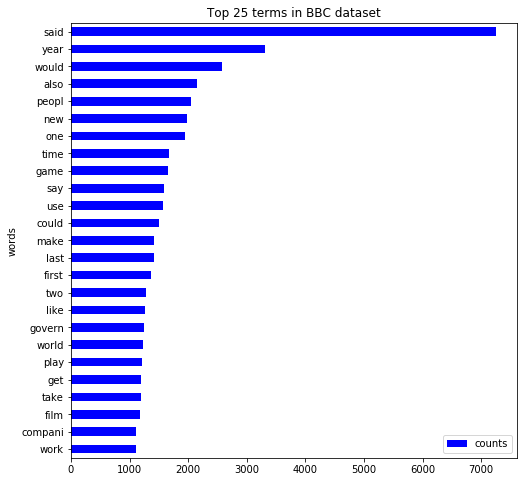

In [7]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
freqTbl.sort_values(by='counts').plot.barh(x='words',
                      y='counts',
                      ax=ax,
                      color="blue")

ax.set_title(f'Top {WORD_COUNT} terms in BBC dataset')

plt.show()